[opencv-python](https://docs.opencv.org/3.4/d3/df2/tutorial_py_basic_ops.html)

### 1、 图片读、写和显示操作

>  cv.imread(), cv.imshow() , cv.imwrite()


#### cv2.imread(path[, flags])
该方法有两个参数：第一个参数是我们所要读取图片的路径， 第二个参数是图片读取的方式，如IMREAD_COLOR 表示加载彩色图片（默认），IMREAD_GRAYSCALE以黑白方式加载图片，IMREAD_UNCHANGED原图加载含alpha channel信息。其中第二个参数的这三个值也可用1，0，-1来表示，方便我们在编程时的输入。

In [1]:
import cv2

# 读图片， 显示图片 原始大小 
img = cv2.imread('image1.jpg', 0)
cv2.imshow('image',img)
k = cv2.waitKey(0)
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()
elif k == ord('s'): # wait for 's' key to save and exit
    cv2.imwrite('messigray.png',img)
    cv2.destroyAllWindows()

#### cv2.namedWindow()对图片窗口先进行命名并进行其他设置，如可改变窗口大小
1. cv2.WINDOW_AUTOSIZE：根据原图大小进行展示
2. cv2.WINDOW_NORMAL：图片窗口可调节大小

In [2]:
import cv2 

img = cv2.imread('image1.jpg')
# 通过设置第二个参数使得图片窗口可调节大小，默认是不可调的（cv2.WINDOW_AUTOSIZE）
cv2.namedWindow('color', cv2.WINDOW_NORMAL)
cv2.imshow('color',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 2、获取图片属性
> Note
img.dtype is very important while debugging because a large number of errors in OpenCV-Python code is caused by invalid datatype

In [3]:
import cv2
img = cv2.imread('image2.jpg')
# 打印出图片一些属性值, 结构，大小，类型
print(img.shape)
print(img.size)
print(img.dtype)

# 打印出图片 某一像素处的 BGR 值
px = img[100, 100]
print(px)

# 取得 图片 某一channel的像素值
px_blue = img[100, 100, 0] # 0:blue, 1: green, 2: Red
print(px_blue)

# 修改像素值
img[100,100] = [255,255,255]
print(img[100, 100])

#  array.item() and array.itemset() 可更快获得数据及修改值
px_red = img.item(10,100,2)
print(px_red)
img.itemset((10,100,2),100)
print(img.item(10,100,2))


(533, 800, 3)
1279200
uint8
[136 142 153]
136
[255 255 255]
175
100


### 3、图上写上文字
cv2.putText()

In [4]:
import cv2
img = cv2.imread('image2.jpg')

font = cv2.FONT_HERSHEY_SIMPLEX  # 定义字体

img_text = cv2.putText(img, 'Nanjing 2016', (50, 50), font, 1.2, (5, 25, 255), 2)
                    # 图像，文字内容，  坐标 ，  字体，大小， 颜色， 字体厚度
# 显示添加文字操作的图像
cv2.imshow('putText',img_text)  
cv2.waitKey(0)

-1

### 图片上移动 某块区域 到另一 坐标上

In [5]:
import cv2

img = cv2.imread('image2.jpg')
ball = img[280:340, 330:390]
img[273:333, 100:160] = ball
cv2.imshow('roi-demo', img)
cv2.waitKey(0)

-1

### 图片平移

In [6]:
import cv2
import numpy as np

img = cv2.imread('image2.jpg')
print(img.shape)
rows,cols, _ = img.shape

M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))

cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

(533, 800, 3)


### 图像旋转

In [7]:
import cv2
import numpy as np

img = cv2.imread('image2.jpg',0)
rows,cols = img.shape

# 第一个参数旋转中心，第二个参数旋转角度，第三个参数：缩放比例
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
# 第三个参数：变换后的图像大小
dst = cv2.warpAffine(img,M,(cols,rows))

cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

###  仿射变换

In [8]:
import cv2
import numpy as np

img = cv2.imread('image2.jpg')
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

cv2.imshow('image',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 通道的拆分/合并处理

```
>>> b = img[:,:,0]
Suppose you want to set all the red pixels to zero, you do not need to split the channels first. Numpy indexing is faster:

>>> img[:,:,2] = 0
Warning

cv.split() is a costly operation (in terms of time). So do it only if you need it. Otherwise go for Numpy indexing.
```

In [9]:
import cv2

img = cv2.imread('image2.jpg')
b,g,r = cv2.split(img)
# img = cv2.merge((r,g,r))
img = cv2.merge((b,g,r))

cv2.imshow('color',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 图片添加边距

* dst	=	cv.copyMakeBorder(	src, top, bottom, left, right, borderType[, dst[, value]]	)


```
src - input image
top, bottom, left, right - border width in number of pixels in corresponding directions
borderType - Flag defining what kind of border to be added. It can be following types:
cv.BORDER_CONSTANT - Adds a constant colored border. The value should be given as next argument.
cv.BORDER_REFLECT - Border will be mirror reflection of the border elements, like this : fedcba|abcdefgh|hgfedcb
cv.BORDER_REFLECT_101 or cv.BORDER_DEFAULT - Same as above, but with a slight change, like this : gfedcb|abcdefgh|gfedcba
cv.BORDER_REPLICATE - Last element is replicated throughout, like this: aaaaaa|abcdefgh|hhhhhhh
cv.BORDER_WRAP - Can't explain, it will look like this : cdefgh|abcdefgh|abcdefg
value - Color of border if border type is cv.BORDER_CONSTANT
```

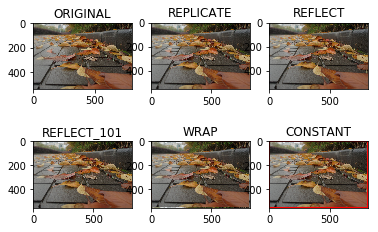

In [3]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


BLUE = [255,0,0]
img1 = cv.imread('image2.jpg')

# matplotlib 里的是 RGB，而opencv里的图片通道数据是 BGR
b,g,r = cv.split(img1)
img1 = cv.merge((r,g,b))

replicate = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_WRAP)
constant= cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()

cv.imshow('color',constant)
cv.waitKey(0)
cv.destroyAllWindows()

###  滤镜和图像运算

颜色空间转换函数 cv2.cvtColor()
> opencv中有多种色彩空间，包括 RGB、HSI、HSL、HSV、HSB、YCrCb、CIE XYZ、CIE Lab8种，使用中经常要遇到色彩空间的转化，以便生成mask图等操作

[opencv︱图像的色彩空間cvtColor（HSV、HSL、HSB ）及相关色彩学](https://blog.csdn.net/sinat_26917383/article/details/70860910)

https://blog.csdn.net/on2way/article/details/46828567

### 滤镜
[opencv python 5 平滑滤波](https://blog.csdn.net/super_chicken/article/details/78672351)

In [2]:
import cv2

img1 = cv2.imread('image2.jpg')

img_cv =  cv2.cvtColor(img1, cv2.COLOR_BGR2HSV) 
cv2.imshow('COLOR_BGR2HSV', img_cv)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### cv2.filter2D()函数来对图像进行卷积操作（图像滤波）
```
dst：输出图像
src：输入图像
ddepth：输出图像深度，-1为与原图相同
kernel：卷积核
anchor：锚点，默认为(-1, -1)，指卷积核的中心点
delta：输出结果时的附加值，默认为0
borderType：边界模式，默认为BORDER_DEFAULT
```

In [5]:
import cv2
import numpy as np 

img = cv2.imread('image2.jpg', 0)
kernel = np.ones((5, 5), np.float32) / 10
res = cv2.filter2D(img, -1, kernel)
cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 图像模糊
图像模糊即使用低通滤波器对图像作卷积，可以有效地消除噪声


过滤是信号和图像处理中基本的任务。其目的是根据应用环境的不同，选择性的提取图像中某些认为是重要的信息。过滤可以移除图像中的噪音、提取感兴趣的可视特征、允许图像重采样，等等。其源自于一般的信号和系统理论，这里将不介绍该理论的细节。

当我们观察一张图片时，我们观察的是图像中有多少灰度级（或颜色）及其分布。根据灰度分布的不同来区分不同的图像。但还有其他方面可以对图像进行分析。我们可以观察图像中灰度的变化。某些图像中包含大量的强度不变的区域（如蓝天），而在其他图像中的灰度变化可能会非常快（如包含许多小物体的拥挤的图像）。因此，观察图像中这些变化的频率就构成了另一条分类图像的方法。这个观点称为频域。而通过观察图像灰度分布来分类图像称为空间域。

频域分析将图像分成从低频到高频的不同部分。低频对应图像强度变化小的区域，而高频是图像强度变化非常大的区域。目前已存在若干转换方法，如傅立叶变换或余弦变换，可以用来清晰的显示图像的频率内容。注意，由于图像是一个二维实体，所以其由水平频率（水平方向的变化）和竖直频率（竖直方向的变化）共同组成。

**在频率分析领域的框架中，滤波器是一个用来增强图像中某个波段或频率并阻塞（或降低）其他频率波段的操作。低通滤波器是消除图像中高频部分，但保留低频部分。高通滤波器消除低频部分**

##### 用低通滤波来平滑图像
低通滤波器的目标是降低图像的变化率。如将每个像素替换为该像素周围像素的均值。这样就可以平滑并替代那些强度变化明显的区域。在OpenCV中，可以通过blur函数做到这一点：

dst = cv2.blur(image,(5,5)); 
其中dst是blur处理后返回的图像，参数一是输入的待处理图像，参数2是低通滤波器的大小。

cv2.blur 滤波器又称为boxfilter
* result1 = cv2.boxFilter(img, -1, (5, 5))
这行代码与上面使用blur函数的效果完全相同。其中第二个参数的-1表示输出图像使用的深度与输入图像相同

#### 高斯模糊
在某些情况下，需要对一个像素的周围的像素给予更多的重视。因此，可通过分配权重来重新计算这些周围点的值。这可通过高斯函数（钟形函数，即喇叭形数）的权重方案来解决。

gaussianResult = cv2.GaussianBlur(img,(5,5),1.5)
*区别

> 低通滤波与高斯滤波的不同之处在于：低通滤波中，滤波器中每个像素的权重是相同的，即滤波器是线性的。而高斯滤波器中像素的权重与其距中心像素的距离成比例。


#### 使用中值滤波消除噪点
非线性过滤器——中值滤波器。由于中值滤波器对消除椒盐现象特别有用。
result = cv2.medianBlur(image,5)

> 函数返回处理结果，第一个参数是待处理图像，第二个参数是孔径的尺寸，一个大于1的奇数。比如这里是5，中值滤波器就会使用5×5的范围来计算。即对像素的中心值及其5×5邻域组成了一个数值集，对其进行处理计算，当前像素被其中值替换掉。

如果在某个像素周围有白色或黑色的像素，这些白色或黑色的像素不会选择作为中值（最大或最小值不用），而是被替换为邻域值。

```
由于中值滤波不会处理最大和最小值，所以就不会受到噪声的影响。相反，如果直接采用blur进行均值滤波，则不会区分这些噪声点，滤波后的图像会受到噪声的影响。

中值滤波器在处理边缘也有优势。但中值滤波器会清除掉某些区域的纹理（如背景中的树）
```


#### 均值滤波  cv.blur(src, ksize[, dst[, anchor[, borderType]]])
> 均值滤波即直接取核中每个像素的均值，由cv2.blur()实现
```
dst：输出图像
src：输入图像
ksize：模糊核的大小
anchor：锚点，默认为(-1, -1)，指卷积核的中心点
borderType：边界模式，默认为BORDER_DEFAULT
```

In [8]:
import cv2
import numpy as np 

img = cv2.imread('image2.jpg', 0)

res = cv2.blur(img, (10, 10))

cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 高斯滤波
cv2.GaussianBlur()根据像素距离使用高斯函数生成权重进行滤波。

> cv.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]])
```
dst：输出图像
src：输入图像
ksize：卷积核的大小
sigmaX：x方向上的标准差
sigmaY：y方向上的标准差
borderType：边界模式，默认为BORDER_DEFAULT
```
若只给了一个sigma则同时视为两轴的sigma，若均为0则根据尺寸自动生成

In [12]:
import cv2
import numpy as np 

img = cv2.imread('image2.jpg', 0)

res = cv2.GaussianBlur(img, (5, 5), 0)

cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 中值滤波
cv2.medianBlur()取核中每个像素的中值作为该像素的值。

dst = cv.medianBlur(src, ksize[, dst])
```
dst：输出图像
src：输入图像
ksize：卷积核的大小
```

In [13]:
import cv2
import numpy as np 

img = cv2.imread('image2.jpg', 0)

res = cv2.medianBlur(img, 5)

cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 双边滤波
cv2.bilateralFilter()双边滤波在高斯滤波的基础上增加了灰度值的影响，可以有效地在保持边缘清晰的情况下去除噪声，但速度较慢。

dst = cv.bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]])
```
dst：输出图像
src：输入图像
d：计算像素范围的直径
sigmaColor：色彩空间的sigma
sigmaSpace：协同空间的sigma
borderType：边界模式，默认为BORDER_DEFAULT
```

In [15]:
import cv2
import numpy as np 

img = cv2.imread('image2.jpg', 0)

res = cv2.bilateralFilter(img, 9, 75, 75)

cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 选区 ROI（region of interest）——感兴趣区域
Python中ROI区域的设置也是使用Numpy中的索引来实现的


In [5]:

import cv2                                     #[1]导入OpenCv开源库
import numpy as np
image_path = "image2.jpg"
srcImg = cv2.imread(image_path)            #[2]将图片加载到内存  

cv2.namedWindow("[srcImg]",cv2.WINDOW_AUTOSIZE)#[3]创建显示窗口
cv2.imshow("[srcImg]",srcImg)                  #[4]在刚才创建的显示窗口中显示刚在加载的图片
 
#========================================================================================================
#模块说明:
#       由于OpenCv中,imread()函数读进来的图片,其本质上就是一个三维的数组,这个NumPy中的三维数组是一致的,所以设置图片的
#   ROI区域的问题,就转换成数组的切片问题,在Python中,数组就是一个列表序列,所以使用列表的切片就可以完成ROI区域的设置
#========================================================================================================
 
img_roi_y = 200                           #[1]设置ROI区域的左上角的起点
img_roi_x = 200                           
img_roi_height = 100                           #[2]设置ROI区域的高度
img_roi_width = 200                           #[3]设置ROI区域的宽度
 
img_roi = srcImg[img_roi_y:(img_roi_y+img_roi_height),img_roi_x:(img_roi_x+img_roi_width)] 
 
cv2.namedWindow("[ROI_Img]",cv2.WINDOW_AUTOSIZE)
cv2.imshow("[ROI_Img]",img_roi)
cv2.imwrite("img_ROI.jpg",img_roi)

cv2.waitKey(0)
cv2.destroyWindow()                  


In [14]:

import cv2
import numpy as np  
  
# 椒盐 效果
def salt(img, n):  
    for k in range(n):  
        i = int(np.random.random() * img.shape[1]);  
        j = int(np.random.random() * img.shape[0]);  
        if img.ndim == 2:   
            img[j,i] = 255  
        elif img.ndim == 3:   
            img[j,i,0]= 255  
            img[j,i,1]= 255  
            img[j,i,2]= 255  
    return img 
 
img = cv2.imread("image2.jpg", 0)
result = salt(img, 500)
median = cv2.medianBlur(result, 5)
 
cv2.imshow("Salt", result)
cv2.imshow("Median", median)

cv2.waitKey(0)
cv2.destroyAllWindows()


### 显示直方图

cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate ]]) #返回hist

>其中第一个参数必须用方括号括起来。
第二个参数是用于计算直方图的通道，这里使用灰度图计算直方图，所以就直接使用第一个通道；
第三个参数是Mask，这里没有使用，所以用None。
第四个参数是histSize，表示这个直方图分成多少份（即多少个直方柱）。第二个例子将绘出直方图，到时候会清楚一点。
第五个参数是表示直方图中各个像素的值，[0.0, 256.0]表示直方图能表示像素值从0.0到256的像素。
最后是两个可选参数，由于直方图作为函数结果返回了，所以第六个hist就没有意义了（待确定）
最后一个accumulate是一个布尔值，用来表示直方图是否叠加。


要理解直方图，绕不开“亮度”这个概念。人们把照片的亮度分为0到255共256个数值，数值越大，代表的亮度越高。其中0代表纯黑色的最暗区域，255表示最亮的纯白色，而中间的数字就是不同亮度的灰色。人们还进一步把这些亮度分为了5个区域，分别是黑色，阴影，中间调，高光和白色。


直方图中柱子的高度，代表了画面中有多少像素是那个亮度，其实就可以看出来画面中亮度的分布和比例



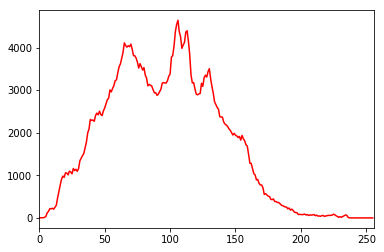

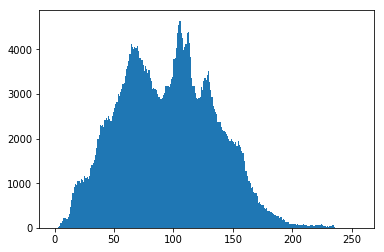

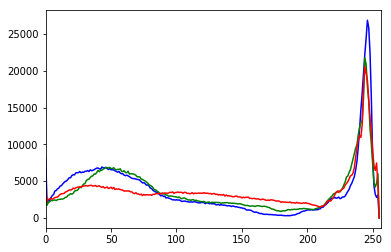

In [40]:
%matplotlib inline

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
image1 = cv2.imread("road.jpg")
image = cv2.imread("image2.jpg", 0)
hist = cv2.calcHist([image],
    [0], #使用的通道
    None, #没有使用mask
    [256], #HistSize
    [0.0, 255.0]) #直方图柱的范围


# print(hist.shape)

plt.plot(hist, color='r')
plt.xlim([0,256])
plt.show()

# Matplotlib有一个绘制直方图的函数：matplotlib.pyplot.hist() 
plt.hist(image.ravel(), 256, [0,256])
plt.show()

color = ('b','g','r')

for i,col in enumerate(color):
    hist = cv2.calcHist([image1],[i],None,[256],[0.0,255.0])
    plt.plot(hist,color=col)
    plt.xlim([0,256])
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

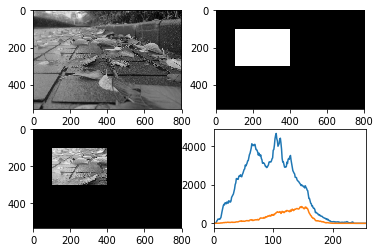

In [34]:
%matplotlib inline

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('image2.jpg', 0)
 
# create a mask  应用遮罩
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv.bitwise_and(img, img, mask=mask)
 
#Calculate histogram with mask and without mask
# Check third argument for mask
"""
蒙板（掩模） 
将要统计的部分设置成白色，其他部分设置成黑色，就构成了蒙板。然后传递给原图像即可
"""
hist_full = cv.calcHist([img], [0], None, [256], [0,256])
hist_mask = cv.calcHist([img], [0], mask, [256], [0,256])
 
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
 
plt.show()

In [8]:

import cv2  
import numpy as np  
       
img = cv2.imread('image2.jpg')  
h = np.zeros((256,256,3)) #创建用于绘制直方图的全0图像  
       
bins = np.arange(256).reshape(256,1) #直方图中各bin的顶点位置  
color = [ (255,0,0),(0,255,0),(0,0,255) ] #BGR三种颜色  
for ch, col in enumerate(color):  
    originHist = cv2.calcHist([img], [ch], None, [256], [0,256])  
    cv2.normalize(originHist, originHist, 0, 255*0.9, cv2.NORM_MINMAX)  
    
    hist=np.int32(np.around(originHist))  
    pts = np.column_stack((bins,hist))  
    cv2.polylines(h,[pts],False,col)  
       
h=np.flipud(h)  
       
cv2.imshow('colorhist',h)  
cv2.waitKey(0) 

(256, 256, 3)


-1

In [3]:
# 彩色图像不同通道的直方图

import cv2    
import numpy as np    
    
img = cv2.imread("image2.jpg")    
b, g, r = cv2.split(img) 

def calcAndDrawHist(image, color):  
    hist= cv2.calcHist([image], [0], None, [256], [0.0,255.0])  
    minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(hist)  
    histImg = np.zeros([256,256,3], np.uint8)  
    hpt = int(0.9* 256);  
      
    for h in range(256):  
        intensity = int(hist[h]*hpt/maxVal)  
        cv2.line(histImg,(h,256), (h,256-intensity), color)  
          
    return histImg; 


histImgB = calcAndDrawHist(b, [255, 0, 0])  
histImgG = calcAndDrawHist(g, [0, 255, 0])  
histImgR = calcAndDrawHist(r, [0, 0, 255])  

cv2.imshow("histImgB", histImgB)  
cv2.imshow("histImgG", histImgG)  
cv2.imshow("histImgR", histImgR)  
cv2.imshow("Img", img)  

cv2.waitKey(0)  
cv2.destroyAllWindows() 

In [8]:
import numpy as np
import cv2 as cv
 
roi = cv.imread('img_ROI.jpg')
hsv = cv.cvtColor(roi, cv.COLOR_BGR2HSV)
 
target = cv.imread('image2.jpg')
hsvt = cv.cvtColor(target, cv.COLOR_BGR2HSV)
 
# 计算对象的直方图
roihist = cv.calcHist([hsv], [0,1], None, [180,256], [0,180,0,256])
 
# 标准化直方图，并应用投影
cv.normalize(roihist, roihist, 0, 255, cv.NORM_MINMAX)
dst = cv.calcBackProject([hsvt], [0,1], roihist, [0,180,0,256], 1)
 
# 与磁盘内核进行卷积
disc = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5))
cv.filter2D(dst, -1, disc, dst)
 
# 阈值、二进制按位和操作
ret, thresh = cv.threshold(dst, 50, 255, 0)
thresh = cv.merge((thresh, thresh, thresh))
res = cv.bitwise_and(target, thresh)
 
res = np.vstack((target, thresh, res))
# cv.imwrite('res.jpg', res)
cv.imshow('hist', res)

cv.waitKey(0)
cv.destroyAllWindows()

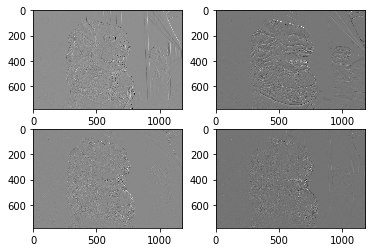

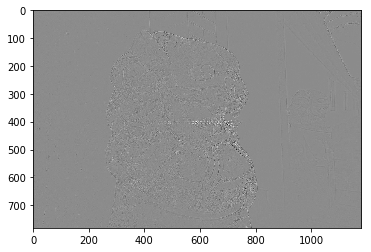

In [7]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('lion.jpg',0)

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)#默认ksize=3
sobely = cv2.Sobel(img,cv2.CV_64F,0,1)
sobelxy = cv2.Sobel(img,cv2.CV_64F,1,1)
laplacian = cv2.Laplacian(img,cv2.CV_64F)#默认ksize=3

#人工生成一个高斯核，去和函数生成的比较
kernel = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]],np.float32)#
img1 = np.float64(img)#转化为浮点型的
img_filter = cv2.filter2D(img1,-1,kernel)
sobelxy1 = cv2.Sobel(img1,-1,1,1)

plt.subplot(221),plt.imshow(sobelx,'gray')
plt.subplot(222),plt.imshow(sobely,'gray')
plt.subplot(223),plt.imshow(sobelxy,'gray')
plt.subplot(224),plt.imshow(laplacian,'gray')

plt.figure()
plt.imshow(img_filter,'gray')

### Sobel算子

Sobel算子依然是一种过滤器，只是其是带有方向的。在OpenCV-Python中，使用Sobel的算子的函数原型如下：

dst = cv2.Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]])

```
函数返回其处理结果。
前四个是必须的参数：

第一个参数是需要处理的图像；
第二个参数是图像的深度，-1表示采用的是与原图像相同的深度。目标图像的深度必须大于等于原图像的深度；
dx和dy表示的是求导的阶数，0表示这个方向上没有求导，一般为0、1、2。
其后是可选的参数：

dst不用解释了；
ksize是Sobel算子的大小，必须为1、3、5、7。
scale是缩放导数的比例常数，默认情况下没有伸缩系数；
delta是一个可选的增量，将会加到最终的dst中，同样，默认情况下没有额外的值加到dst中；
borderType是判断图像边界的模式。这个参数默认值为cv2.BORDER_DEFAULT。
```



Laplacian算子：图像中的边缘区域，像素值会发生“跳跃”，对这些像素求导，在其一阶导数在边缘位置为极值，这就是Sobel算子使用的原理——极值处就是边缘。

```
dst = cv2.Laplacian(src, ddepth[, dst[, ksize[, scale[, delta[, borderType]]]]])

'''
前两个是必须的参数：

第一个参数是需要处理的图像；
第二个参数是图像的深度，-1表示采用的是与原图像相同的深度。目标图像的深度必须大于等于原图像的深度；
其后是可选的参数：

dst不用解释了；
ksize是算子的大小，必须为1、3、5、7。默认为1。
scale是缩放导数的比例常数，默认情况下没有伸缩系数；
delta是一个可选的增量，将会加到最终的dst中，同样，默认情况下没有额外的值加到dst中；
borderType是判断图像边界的模式。这个参数默认值为cv2.BORDER_DEFAULT。
'''
```



In [11]:

import cv2
import numpy as np  
 
img = cv2.imread("lion.jpg", 0)
 
"""
在Sobel函数的第二个参数这里使用了cv2.CV_16S。
因为OpenCV文档中对Sobel算子的介绍中有这么一句：
“in the case of 8-bit input images it will result in truncated derivatives”。
即Sobel函数求完导数后会有负值，还有会大于255的值。而原图像是uint8，即8位无符号数，
所以Sobel建立的图像位数不够，会有截断。因此要使用16位有符号的数据类型，即cv2.CV_16S
"""
x = cv2.Sobel(img,cv2.CV_16S,1,0)
y = cv2.Sobel(img,cv2.CV_16S,0,1)

"""
在经过处理后，别忘了用convertScaleAbs()函数将其转回原来的uint8形式。否则将无法显示图像，而只是一副灰色的窗口。

dst = cv2.convertScaleAbs(src[, dst[, alpha[, beta]]])
可选参数alpha是伸缩系数，beta是加到结果上的一个值。结果返回uint8类型的图片
"""
absX = cv2.convertScaleAbs(x)   # 转回uint8
absY = cv2.convertScaleAbs(y)

"""
由于Sobel算子是在两个方向计算的，最后还需要用cv2.addWeighted(...)函数将其组合起来
dst = cv2.addWeighted(src1, alpha, src2, beta, gamma[, dst[, dtype]])
其中alpha是第一幅图片中元素的权重，beta是第二个的权重，gamma是加到最后结果上的一个值。
"""
dst = cv2.addWeighted(absX,0.5,absY,0.5,0)
 
cv2.imshow("absX", absX)
cv2.imshow("absY", absY)
 
cv2.imshow("Result", dst)
 
cv2.waitKey(0)
cv2.destroyAllWindows() 

In [9]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread("lion.jpg", 0)
 
gray_lap = cv2.Laplacian(img,cv2.CV_16S,ksize = 3)
dst = cv2.convertScaleAbs(gray_lap)
 
cv2.imshow('laplacian',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [8]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('lion.jpg')
edges = cv2.Canny(img,100,200)#其他的默认
# plt.subplot(121),plt.imshow(img,'gray')
# plt.subplot(122),plt.imshow(edges,'gray')
cv2.imshow('edges', edges)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 形态学处理
形态学处理的核心就是定义结构元素，在OpenCV-Python中，可以使用其自带的getStructuringElement函数
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))
> 定义了一个5×5的十字形结构元素
* 常量定义椭圆（MORPH_ELLIPSE）
* 十字形结构（MORPH_CROSS）
* 定义矩形（MORPH_RECT）

#### 腐蚀和膨胀
只需设置好结构元素，然后分别调用**cv2.erode(...)** 和 **cv2.dilate(...)** 函数即可，其中第一个参数是需要处理的图像，第二个是结构元素。

In [15]:
import cv2
import numpy as np
 
img = cv2.imread('image2.jpg',0)
#OpenCV定义的结构元素
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3, 3))
 
#腐蚀图像
eroded = cv2.erode(img,kernel)
#显示腐蚀后的图像
cv2.imshow("Eroded Image",eroded);
 
#膨胀图像
dilated = cv2.dilate(img,kernel)
#显示膨胀后的图像
cv2.imshow("Dilated Image",dilated);
#原图像
cv2.imshow("Origin", img)
 
#NumPy定义的结构元素
NpKernel = np.uint8(np.ones((3,3)))
Nperoded = cv2.erode(img,NpKernel)
#显示腐蚀后的图像
cv2.imshow("Eroded by NumPy kernel",Nperoded);
 
cv2.waitKey(0)
cv2.destroyAllWindows()

### 开运算和闭运算
开运算和闭运算就是将腐蚀和膨胀按照一定的次序进行处理。但这两者并不是可逆的，即先开后闭并不能得到原先的图像

> 闭运算用来连接被误分为许多小块的对象，而开运算用于移除由图像噪音形成的斑点。因此，某些情况下可以连续运用这两种运算。如对一副二值图连续使用闭运算和开运算，将获得图像中的主要对象。同样，如果想消除图像中的噪声（即图像中的“小点”），也可以对图像先用开运算后用闭运算，不过这样也会消除一些破碎的对象

#### 开运算
处理过程：先腐蚀后膨胀。 
功能：用于消除小物体，在纤细点处分离物体，并且在平滑较大物体的边界的同时不明显改变其面积，同时抑制比结构元小的亮细节

#### 闭运算
处理过程：先膨胀后腐蚀 
功能：用来填充物体内细小空洞、连接邻近物体、平滑其边界的同时并不明显改变其面积，同时抑制比结构元小的暗细节。 

In [16]:
import cv2
import numpy as np
 
img = cv2.imread('image2.jpg',0)
#定义结构元素
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5, 5))
 
#闭运算
closed = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
#显示腐蚀后的图像
cv2.imshow("Close",closed);
 
#开运算
opened = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
#显示腐蚀后的图像
cv2.imshow("Open", opened);
 
cv2.waitKey(0)
cv2.destroyAllWindows()

### 用形态学运算检测边和角点

用形态学算子检测图像中的边缘和拐角（这里只是作为介绍形态学处理例子，实际使用时请用Canny或Harris等算法）

#### 检测边缘
形态学检测边缘的原理很简单，在膨胀时，图像中的物体会想周围“扩张”；腐蚀时，图像中的物体会“收缩”。比较这两幅图像，由于其变化的区域只发生在边缘。所以这时将两幅图像相减，得到的就是图像中物体的边缘。



In [17]:

import cv2
import numpy
 
image = cv2.imread("building.jpg",0);
#构造一个3×3的结构元素 
element = cv2.getStructuringElement(cv2.MORPH_RECT,(3, 3))
dilate = cv2.dilate(image, element)
erode = cv2.erode(image, element)
 
#将两幅图像相减获得边，第一个参数是膨胀后的图像，第二个参数是腐蚀后的图像
result = cv2.absdiff(dilate,erode);
 
#上面得到的结果是灰度图，将其二值化以便更清楚的观察结果
retval, result = cv2.threshold(result, 40, 255, cv2.THRESH_BINARY); 
#反色，即对二值图每个像素取反
result = cv2.bitwise_not(result); 
#显示图像
cv2.imshow("result",result); 
cv2.waitKey(0)
cv2.destroyAllWindows()

In [33]:
"""
检测拐角
与边缘检测不同，拐角的检测的过程稍稍有些复杂。但原理相同，所不同的是先用十字形的结构元素膨胀像素，
这种情况下只会在边缘处“扩张”，角点不发生变化。接着用菱形的结构元素腐蚀原图像，导致只有在拐角处才会“收缩”，
而直线边缘都未发生变化。

第二步是用X形膨胀原图像，角点膨胀的比边要多。这样第二次用方块腐蚀时，角点恢复原状，而边要腐蚀的更多。
所以当两幅图像相减时，只保留了拐角处。
"""
import cv2
 
image = cv2.imread("building.jpg", 0)
origin = cv2.imread("building.jpg")

#构造5×5的结构元素，分别为十字形、菱形、方形和X型
cross = cv2.getStructuringElement(cv2.MORPH_CROSS,(5, 5))

#菱形结构元素的定义稍麻烦一些
diamond = cv2.getStructuringElement(cv2.MORPH_RECT,(5, 5))

diamond[0, 0] = 0
diamond[0, 1] = 0
diamond[1, 0] = 0
diamond[4, 4] = 0
diamond[4, 3] = 0
diamond[3, 4] = 0
diamond[4, 0] = 0
diamond[4, 1] = 0
diamond[3, 0] = 0
diamond[0, 3] = 0
diamond[0, 4] = 0
diamond[1, 4] = 0

square = cv2.getStructuringElement(cv2.MORPH_RECT,(5, 5))

x = cv2.getStructuringElement(cv2.MORPH_CROSS,(5, 5))

#使用cross膨胀图像
result1 = cv2.dilate(image,cross)
#使用菱形腐蚀图像
result1 = cv2.erode(result1, diamond)
 
#使用X膨胀原图像 
result2 = cv2.dilate(image, x)
#使用方形腐蚀图像 
result2 = cv2.erode(result2,square)
 
#result = result1.copy()
#将两幅闭运算的图像相减获得角 
result = cv2.absdiff(result2, result1)
#使用阈值获得二值图
retval, result = cv2.threshold(result, 40, 255, cv2.THRESH_BINARY)


#在原图上用半径为5的圆圈将点标出。
for j in range(result.size):
    y = j // result.shape[0] 
    x = j % result.shape[0]
    
    if result[x, y] == 255:
        cv2.circle(image, (y, x), 5, (255, 0, 0))
        
cv2.imshow("Result", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


### Canny边缘检测

>edge = cv2.Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient ]]]) 

必要参数：
第一个参数是需要处理的原图像，该图像必须为单通道的灰度图；
第二个参数是阈值1；
第三个参数是阈值2。
其中较大的阈值2用于检测图像中明显的边缘，但一般情况下检测的效果不会那么完美，边缘检测出来是断断续续的。所以这时候用较小的第一个阈值用于将这些间断的边缘连接起来.
可选参数中apertureSize就是Sobel算子的大小。而L2gradient参数是一个布尔值，如果为真，则使用更精确的L2范数进行计算（即两个方向的倒数的平方和再开放），否则使用L1范数（直接将两个方向导数的绝对值相加）




In [35]:
import cv2
import numpy as np  
 
img = cv2.imread("lion.jpg", 0)

"""
首先，由于Canny只能处理灰度图，所以将读取的图像转成灰度图。
用高斯平滑处理原图像降噪。

调用Canny函数，指定最大和最小阈值，其中apertureSize默认为3
"""
 
img = cv2.GaussianBlur(img,(3,3),0)
canny = cv2.Canny(img, 50, 150)
 
cv2.imshow('Canny', canny)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
# 在运行时调整阈值大小
# https://github.com/abidrahmank/OpenCV2-Python/blob/master/Official_Tutorial_Python_Codes/3_imgproc/canny.py
import cv2
import numpy as np
 
def CannyThreshold(lowThreshold):
    detected_edges = cv2.GaussianBlur(gray,(3,3),0)
    detected_edges = cv2.Canny(detected_edges,lowThreshold,lowThreshold*ratio,apertureSize = kernel_size)
    dst = cv2.bitwise_and(img,img,mask = detected_edges)  # just add some colours to edges from original image.
    cv2.imshow('canny demo',dst)

    
lowThreshold = 0
max_lowThreshold = 100
ratio = 3
kernel_size = 3
 
img = cv2.imread('lion.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
 
cv2.namedWindow('canny demo')
 
cv2.createTrackbar('Min threshold','canny demo',lowThreshold, max_lowThreshold, CannyThreshold)
 
CannyThreshold(0)  # initialization

if cv2.waitKey(0) == 27:
    cv2.destroyAllWindows()


### 霍夫变换
Hough变换是经典的检测直线的算法。其最初用来检测图像中的直线，同时也可以将其扩展，以用来检测图像中简单的结构。

OpenCV提供了两种用于直线检测的Hough变换形式。其中基本的版本是cv2.HoughLines。其输入一幅含有点集的二值图（由非0像素表示），其中一些点互相联系组成直线。通常这是通过如Canny算子获得的一幅边缘图像。cv2.HoughLines函数输出的是[float, float]形式的ndarray，其中每个值表示检测到的线(ρ , θ)中浮点点值的参数。下面的例子首先使用Canny算子获得图像边缘，然后使用Hough变换检测直线。其中HoughLines函数的参数3和4对应直线搜索的步长。

In [11]:
#coding=utf-8
import cv2
import numpy as np  
 
img = cv2.imread("road11.jpg", 0)
 
img = cv2.GaussianBlur(img,(3,3),0)
edges = cv2.Canny(img, 50, 150, apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,118) #这里对最后一个参数使用了经验型的值
result = img.copy()
for line in lines[0]:
	rho = line[0] #第一个元素是距离rho
	theta= line[1] #第二个元素是角度theta
	print(rho)
	print(theta)
	if  (theta < (np.pi/4. )) or (theta > (3.*np.pi/4.0)): #垂直直线
                #该直线与第一行的交点
		pt1 = (int(rho/np.cos(theta)),0)
		#该直线与最后一行的焦点
		pt2 = (int((rho-result.shape[0]*np.sin(theta))/np.cos(theta)),result.shape[0])
		#绘制一条白线
		cv2.line( result, pt1, pt2, (255))
	else: #水平直线
		# 该直线与第一列的交点
		pt1 = (0,int(rho/np.sin(theta)))
		#该直线与最后一列的交点
		pt2 = (result.shape[1], int((rho-result.shape[1]*np.cos(theta))/np.sin(theta)))
		#绘制一条直线
		cv2.line(result, pt1, pt2, (255), 1)
 
cv2.imshow('Canny', edges )
cv2.imshow('Result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()


-14.0
2.1293018


#### 概率霍夫变换
观察前面的例子得到的结果图片，其中Hough变换看起来就像在图像中查找对齐的边界像素点集合。但这样会在一些情况下导致虚假检测，如像素偶然对齐或多条直线穿过同样的对齐像素造成的多重检测。

要避免这样的问题，并检测图像中分段的直线（而不是贯穿整个图像的直线），就诞生了Hough变化的改进版，即概率Hough变换（Probabilistic Hough）。在OpenCV中用函数cv::HoughLinesP 实现

In [12]:
import cv2
import numpy as np  
 
img = cv2.imread("road11.jpg")
 
img = cv2.GaussianBlur(img,(3,3),0)
edges = cv2.Canny(img, 50, 150, apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,118)
result = img.copy()
 
#经验参数
minLineLength = 200
maxLineGap = 15
lines = cv2.HoughLinesP(edges,1,np.pi/180,80,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
	cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
 
cv2.imshow('Result', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


### 直方图均衡化

在某些情况下，一副图像中大部分像素的强度都集中在某一区域，而质量较高的图像中，像素的强度应该均衡的分布。为此，可将表示像素强度的直方图进行拉伸，将其平坦化。

在图像处理中，直方图均衡化一般用来均衡图像的强度，或增加图像的对比度。在介绍使用直方图均衡化来拉伸图像的直方图之前，先介绍使用查询表的方法。

观察上图中原始图像的直方图，很容易发现大部分强度值范围都没有用到。因此先检测图像非0的最低（imin）强度值和最高（imax）强度值。将最低值imin设为0，最高值imax设为255。中间的按255.0*(i-imin)/(imax-imin)+0.5)的形式设置。

> result = cv2.LUT(image, lut)

* 只有两个参数，分别为输入图像和查找表，其返回处理的结果


#### OpenCV实现直方图均衡化

cv2.equalizeHist(img)

In [18]:
#coding=utf-8import cv2
import numpy as np
 
image = cv2.imread("unequ.jpg", 0)
cv2.imshow('origin', image)
lut = np.zeros(256, dtype = image.dtype )#创建空的查找表
hist= cv2.calcHist([image], #计算图像的直方图
    [0], #使用的通道
    None, #没有使用mask
    [256], #it is a 1D histogram
    [0.0,255.0])
minBinNo, maxBinNo = 0, 255
 
#计算从左起第一个不为0的直方图柱的位置
for binNo, binValue in enumerate(hist):
    if binValue != 0:
        minBinNo = binNo
        break
#计算从右起第一个不为0的直方图柱的位置
for binNo, binValue in enumerate(reversed(hist)):
    if binValue != 0:
        maxBinNo = 255-binNo
        break
print(minBinNo, maxBinNo)
 
#生成查找表，方法来自参考文献1第四章第2节
for i,v in enumerate(lut):
#     print(i)
    if i < minBinNo:
        lut[i] = 0
    elif i > maxBinNo:
        lut[i] = 255
    else:
        lut[i] = int(255.0*(i-minBinNo)/(maxBinNo-minBinNo)+0.5)

        
#计算
result = cv2.LUT(image, lut)
cv2.imshow("Result", result)
cv2.imwrite("LutImage.jpg", result)

equ = cv2.equalizeHist(image)
cv2.imshow('equ',equ)

cv2.waitKey(0)
cv2.destroyAllWindows()


87 247


### 人脸识别  物体识别
[Face Detection using Haar Cascades](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html#face-detection)

In [53]:
import cv2

# 待检测的图片路径

imagepath = 'heat.jpg'

 

# 获取训练好的人脸的参数数据，这里直接从GitHub上使用默认值

face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

 

# 读取图片

image = cv2.imread(imagepath)

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

 

# 探测图片中的人脸

faces = face_cascade.detectMultiScale(

    gray,

    scaleFactor = 1.15,

    minNeighbors = 5,

    minSize = (5,5),

    flags = cv2.CASCADE_SCALE_IMAGE

)

 

print("发现{0}个人脸!".format(len(faces)))

 

for(x,y,w,h) in faces:

    # cv2.rectangle(image,(x,y),(x+w,y+w),(0,255,0),2)

    cv2.circle(image,((x+x+w)//2,(y+y+h)//2),w//2,(0,255,0),2)

 

cv2.imshow("Find Faces!",image)

cv2.waitKey(0)
cv2.destroyAllWindows()

发现3个人脸!


In [40]:
import numpy
import cv2
 
face_cascade = cv2.CascadeClassifier("data/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier('data/haarcascades/haarcascade_eye.xml')
 
img = cv2.imread("head.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


faces = face_cascade.detectMultiScale(gray, 1.2, 2)

# # 探测图片中的人脸

# faces = face_cascade.detectMultiScale(

#     gray,

#     scaleFactor = 1.15,

#     minNeighbors = 5,

#     minSize = (5,5),

#     flags = cv2.CASCADE_SCALE_IMAGE

# )


for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
#         cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        radius_x = ex + ew//2
        radius_y = ey + eh//2
        cv2.circle(roi_color, (radius_x, radius_y), 30, (0, 0, 255), 5)

cv2.imshow('img',img)
cv2.waitKey(0)


-1

###  画线等操作

* cv2.line()
* cv2.rectangle()
* cv2.circle()


In [41]:
import numpy
import cv2
 
# Create a black image
img = numpy.zeros((512,512,3), numpy.uint8)
 
# Draw a diagonal blue line with thickness of 5 px
cv2.line(img,(0,0),(511,511),(255,0,0),5)
 
# draw a rectangle
cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)
 
# draw a circle
cv2.circle(img,(447,63), 63, (0,0,255), -1)

cv2.circle(img,(200,250), 50, (0,0,255), 0)
 
# add text
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'hello', (10,500), font, 4, (255,0,255), 10)
 
# write file to disk
# cv2.namedWindow("Image")
 
cv2.imshow("Image", img)
key = cv2.waitKey (0)
cv2.destroyAllWindows()


### 